In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
train = pd.read_csv('Competition_Train.csv')
test = pd.read_csv('Competition_Test.csv')

<Axes: >

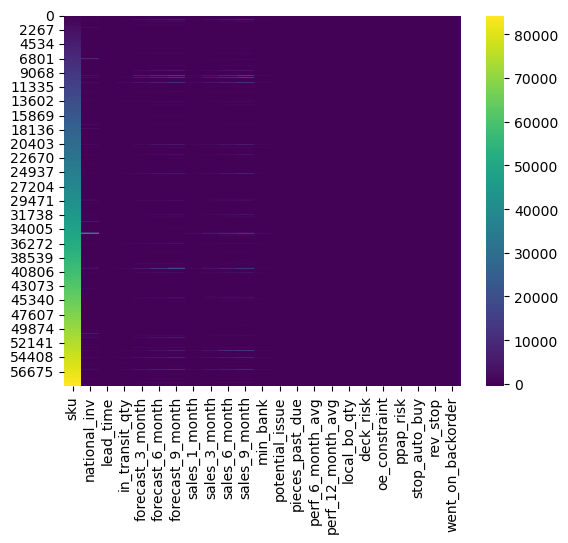

In [17]:
sns.heatmap(train, cmap='viridis')

In [8]:
train.potential_issue.value_counts()

test.potential_issue.value_counts()

potential_issue
0    25232
1       20
Name: count, dtype: int64

In [19]:
train['potential_issue'] = train['potential_issue'].astype('int')
train['deck_risk'] = train['deck_risk'].astype('int')
train['oe_constraint'] = train['oe_constraint'].astype('int')
train['ppap_risk'] = train['ppap_risk'].astype('int')
train['stop_auto_buy'] = train['stop_auto_buy'].astype('int')
train['went_on_backorder'] = train['went_on_backorder'].astype('int')
train['rev_stop'] = train['rev_stop'].astype('int')


In [15]:
test['potential_issue'] = test['potential_issue'].astype('int')
test['deck_risk'] = test['deck_risk'].astype('int')
test['oe_constraint'] = test['oe_constraint'].astype('int')
test['ppap_risk'] = test['ppap_risk'].astype('int')
test['stop_auto_buy'] = test['stop_auto_buy'].astype('int')
test['rev_stop'] = test['rev_stop'].astype('int')

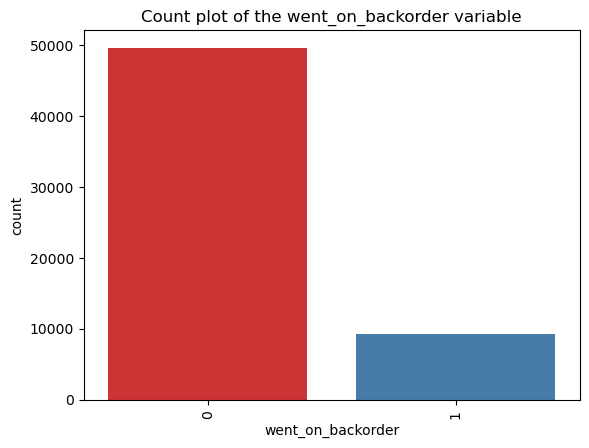

In [28]:
# Plot count plot
sns.countplot(x='went_on_backorder', data=train, palette='Set1', order=[0, 1])
plt.title("Count plot of the went_on_backorder variable")
plt.xticks(rotation=90)
plt.show()

In [31]:
#train = train.drop(['sku'], axis=1)

In [30]:
train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,4,2,0,0,0,0,0,0,0,0,...,0,0.18,0.31,0,1,0,0,1,0,0
1,2,16,0,0,0,0,0,0,0,0,...,0,0.31,0.40,0,0,0,0,1,0,0
2,4,4,0,0,0,0,0,0,0,0,...,0,0.73,0.78,0,0,0,0,1,0,0
3,0,9,0,1,1,1,0,0,0,0,...,0,0.86,0.69,0,0,0,0,1,0,0
4,300,8,0,0,0,0,0,40,100,122,...,0,0.00,0.00,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58914,11,8,0,0,0,0,2,6,17,26,...,0,0.54,0.64,0,1,0,0,1,0,0
58915,0,8,0,4,5,7,2,3,4,5,...,0,0.76,0.77,0,0,0,0,1,0,1
58916,0,2,0,1,1,1,0,0,0,0,...,0,0.09,0.06,0,0,0,0,1,0,1
58917,6,4,0,0,0,0,0,0,0,0,...,0,0.77,0.80,0,1,0,0,1,0,0


In [32]:
x = train.drop(['went_on_backorder'], axis=1).values
y = train['went_on_backorder'].values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=326)

In [35]:
from imblearn.over_sampling import SMOTE

In [38]:
# Create SMOTE object
sm = SMOTE(random_state=326, sampling_strategy=1.0)

# Resample the training data
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


In [39]:
x_train_res.shape, y_train_res.shape

((66584, 21), (66584,))

In [40]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 49624, 1: 9295})
Resampled dataset shape Counter({0: 33292, 1: 33292})


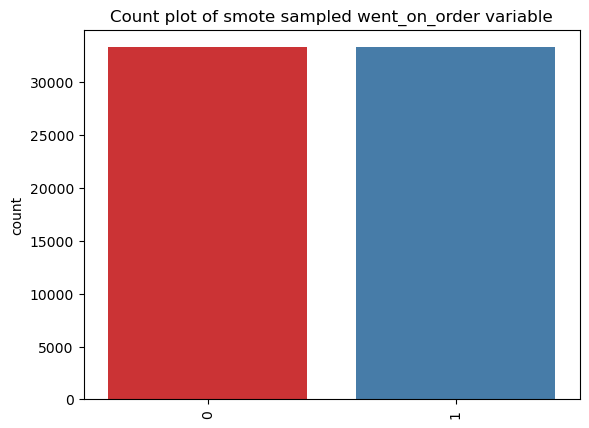

In [53]:
sns.countplot(x=y_train_res, palette='Set1', order=[0, 1])
plt.title("Count plot of smote sampled went_on_order variable")
plt.xticks(rotation=90)
plt.show()

In [55]:
#!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 8.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1


In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable

In [57]:
x_train_res = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train_res = torch.LongTensor(y_train) ## LongTensor dosent converts it into floating point 
y_test = torch.LongTensor(y_test)

In [58]:
class Net(nn.Module):
    def __init__(self, in_count, output_count):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(in_count, 50)
        self.fc2 = nn.Linear(50, 25)
        self.fc3 = nn.Linear(25, output_count)
        self.softmax = nn.Softmax()
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.fc3(x)
        return self.softmax(x)

In [59]:
model = Net(x.shape[1], 2)

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [61]:
final_losses = []
for epochs in range(50):
    optimizer.zero_grad()
    out = model(x_train_res)
    loss = criterion(out, y_train_res)
    final_losses.append(loss)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epochs+1}, loss: {loss.item()}")

/Applications/anaconda3/lib/python3.11/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 1, loss: 0.669340193271637
Epoch 2, loss: 0.4967506229877472
Epoch 3, loss: 0.4782865047454834
Epoch 4, loss: 0.47226864099502563
Epoch 5, loss: 0.4695757329463959
Epoch 6, loss: 0.46502190828323364
Epoch 7, loss: 0.4550388753414154
Epoch 8, loss: 0.44422513246536255
Epoch 9, loss: 0.45321545004844666
Epoch 10, loss: 0.44072800874710083
Epoch 11, loss: 0.4430595338344574
Epoch 12, loss: 0.4469977915287018
Epoch 13, loss: 0.4417661428451538
Epoch 14, loss: 0.43116524815559387
Epoch 15, loss: 0.4291902482509613
Epoch 16, loss: 0.42946672439575195
Epoch 17, loss: 0.4213731586933136
Epoch 18, loss: 0.42004239559173584
Epoch 19, loss: 0.42337465286254883
Epoch 20, loss: 0.4135042726993561
Epoch 21, loss: 0.410309761762619
Epoch 22, loss: 0.4126381278038025
Epoch 23, loss: 0.4097375273704529
Epoch 24, loss: 0.40576663613319397
Epoch 25, loss: 0.409510999917984
Epoch 26, loss: 0.40716028213500977
Epoch 27, loss: 0.4050290882587433
Epoch 28, loss: 0.4050549268722534
Epoch 29, loss: 0.403

In [62]:
from sklearn.metrics import accuracy_score

pred = model(x_test)
_, predict_classes = torch.max(pred,1)

correct = accuracy_score(y_test, predict_classes)
print(f"Accurcay :   {correct}")

Accurcay :   0.9041349516560379


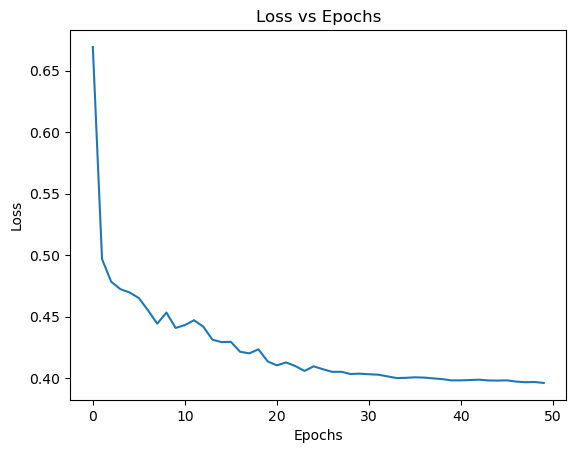

In [64]:


# Convert the tensor to a NumPy array using .detach().numpy()
final_losses_np = [loss.detach().numpy() for loss in final_losses]

# Plot the loss versus the number of epochs
plt.plot(range(len(final_losses_np)), final_losses_np)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()


In [65]:
predictions = []

with torch.no_grad():
    for i, data in enumerate(x_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

/Applications/anaconda3/lib/python3.11/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
1
1
0
0
1
1
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0


0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
1
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
1
0
0
1
1
1
0
0
1
0
0
1
1
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
0
1
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
1
1
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0


0
0
1
1
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0


1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
1
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
1
1
0
1
0
1
0
0
0
0
0
1
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0


In [73]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 16.6 MB/s eta 0:00:0000:010:01m
